___

# Finance Data Project 

In this data project I will focus on exploratory data analysis of stock prices. This project is just meant for practice in data visualization and pandas skills and it is not meant to be a robust financial analysis or be taken as financial advice.
____
I'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

**by Saumitra Pathak**

## Data and Setup

The idea was to fetch the data directly from Yahoo Finance with the help of pandas DataReader but I used a pickle file which was provided by the instructor as it had data. 


### Imports


In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
cf.go_offline()
sns.set_style('whitegrid')
%matplotlib inline

## Data

The pickle files has stock information for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [2]:
# start = datetime.datetime(2006, 1, 1)
# end = datetime.datetime(2016, 1, 1)
# BAC = data.DataReader("BAC", 'yahoo', start, end)
# C = data.DataReader("C", 'yahoo', start, end)
# GS = data.DataReader("GS", 'yahoo', start, end)
# JPM = data.DataReader("JPM", 'yahoo', start, end)
# MS = data.DataReader("MS", 'yahoo', start, end)
# WF = data.DataReader("WF", 'yahoo', start, end)

In [3]:
df = pd.read_pickle('all_banks')
BAC = df['BAC']
C = df['C']
GS = df['GS']
JPM = df['JPM']
MS = df['MS']
WFC = df['WFC']

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Creating a new datafram bank_stocks that has information of all the banks**

In [5]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# Exploratory Data Analysis

**What is the max Close price for each bank's stock throughout the time period?**

In [8]:
bank_stocks.xs('Close', level='Stock Info', axis=1).max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns = pd.DataFrame()

In [10]:
for tick in tickers:
    returns[tick+' returns'] = bank_stocks[tick]['Close'].pct_change()

In [11]:
returns.head()

,BAC returns,C returns,GS returns,JPM returns,MS returns,WFC returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

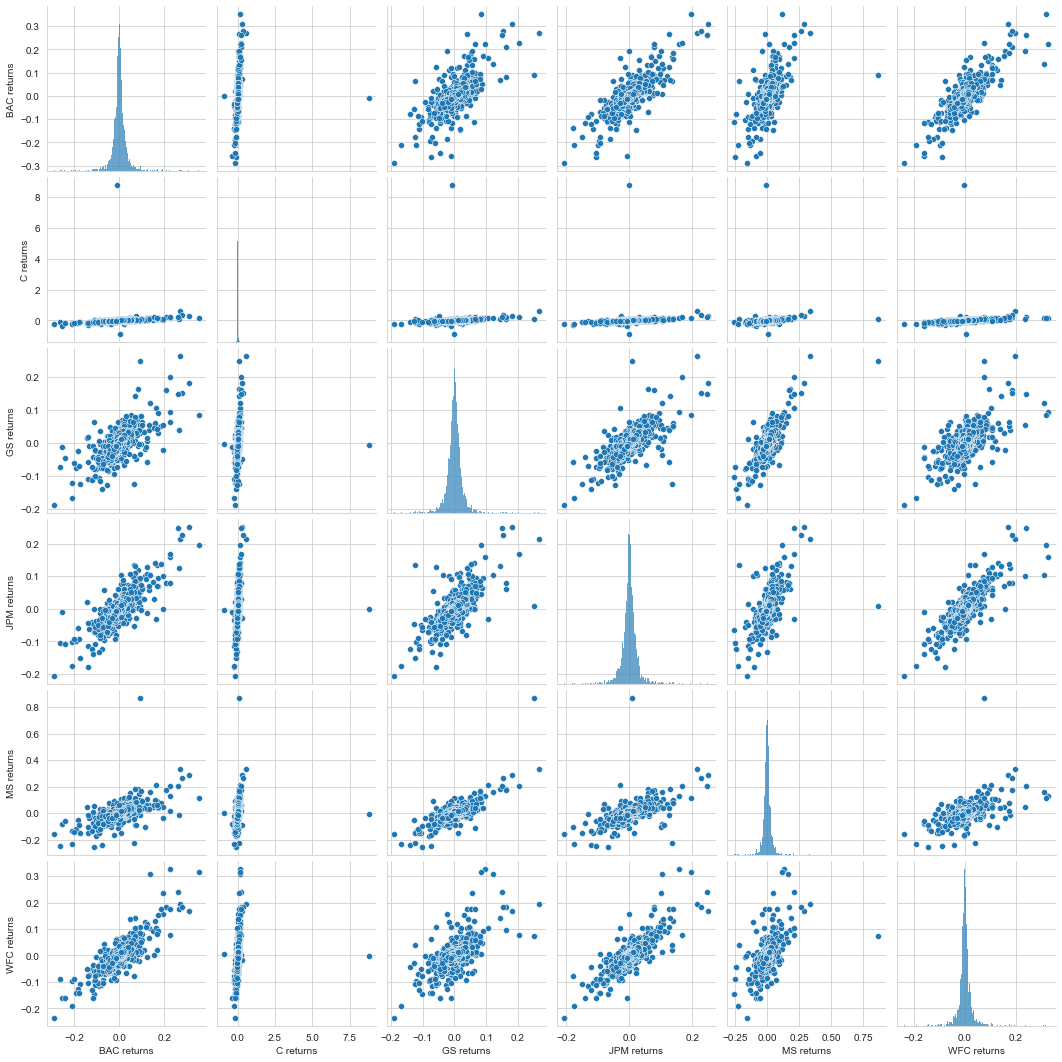

In [12]:
sns.pairplot(returns)

The stock that stands out the most from this pairplot is the nature of CitiGroup returns, this was due to the massive stock crash they had which can be studied deeply with this link [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

**Figure out on what dates each bank stock had the best and worst single day returns.**

In [13]:
returns.idxmin()

BAC returns   2009-01-20
C returns     2011-05-06
GS returns    2009-01-20
JPM returns   2009-01-20
MS returns    2008-10-09
WFC returns   2009-01-20
dtype: datetime64[ns]

In [14]:
returns.idxmax()

BAC returns   2009-04-09
C returns     2011-05-09
GS returns    2008-11-24
JPM returns   2009-01-21
MS returns    2008-10-13
WFC returns   2008-07-16
dtype: datetime64[ns]

**Citigroup once again shows some peculiar behavior as we can notice that Citigroup's largets drop and biggest gain were very close to one another due to their stock split. [Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)**

----
**Which stock would you classify as the riskiest over the entire time period?** 

In [15]:
returns.std()

BAC returns    0.036650
C returns      0.179969
GS returns     0.025346
JPM returns    0.027656
MS returns     0.037820
WFC returns    0.030233
dtype: float64

Citigroup was the riskiest over the entire time period

**Which would you classify as the riskiest for the year 2015?**

In [16]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC returns    0.016163
C returns      0.015289
GS returns     0.014046
JPM returns    0.014017
MS returns     0.016249
WFC returns    0.012591
dtype: float64

Morgan Stanley

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

(0.0, 45.0)

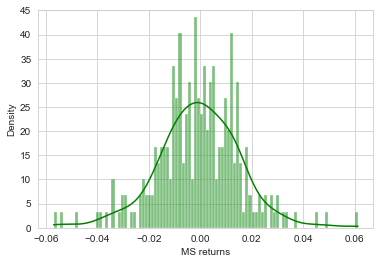

In [17]:
sns.histplot(x='MS returns', data=returns.loc['2015-01-01':'2015-12-31'], stat='density', bins=100, kde=True, color='Green')
plt.ylim(0, 45)

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

(0.0, 10.0)

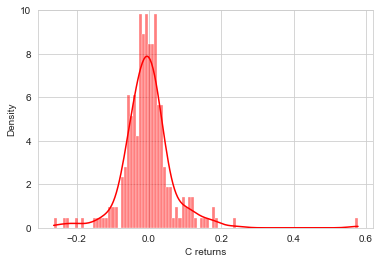

In [18]:
sns.histplot(x='C returns', data=returns.loc['2008-01-01':'2008-12-31'], stat='density', bins=100, kde=True, color='Red')
plt.ylim(0, 10)

**Create a line plot showing Close price for each bank for the entire index of time. 

In [19]:
bank_stocks.xs('Close', level='Stock Info', axis=1).iplot()

## Moving Averages

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

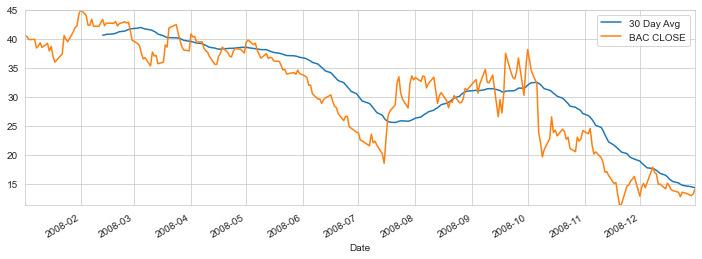

In [20]:
bank_stocks.loc['2008-01-01':'2009-01-01']['BAC']['Close'].rolling(window=30).mean().plot(label='30 Day Avg', figsize=(12, 4))
bank_stocks.loc['2008-01-01':'2009-01-01']['BAC']['Close'].plot(label='BAC CLOSE')
plt.legend()
plt.margins(0, 0)


**Create a heatmap of the correlation between the stocks Close Price.**

In [21]:
close_price = bank_stocks.xs(key='Close', level='Stock Info', axis=1).corr()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

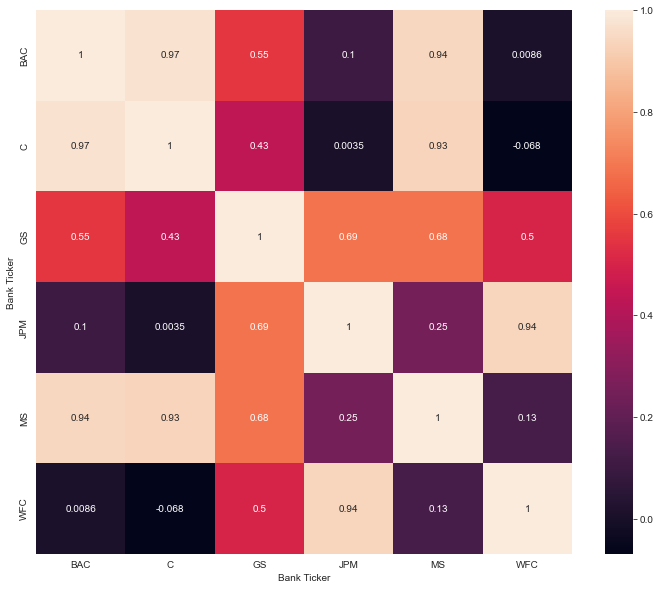

In [22]:
fig = plt.figure(figsize=(12, 10))
sns.heatmap(close_price, annot=True)

**Create a clustermap of the correlation between the stocks Close Price.**

<Figure size 864x720 with 0 Axes>

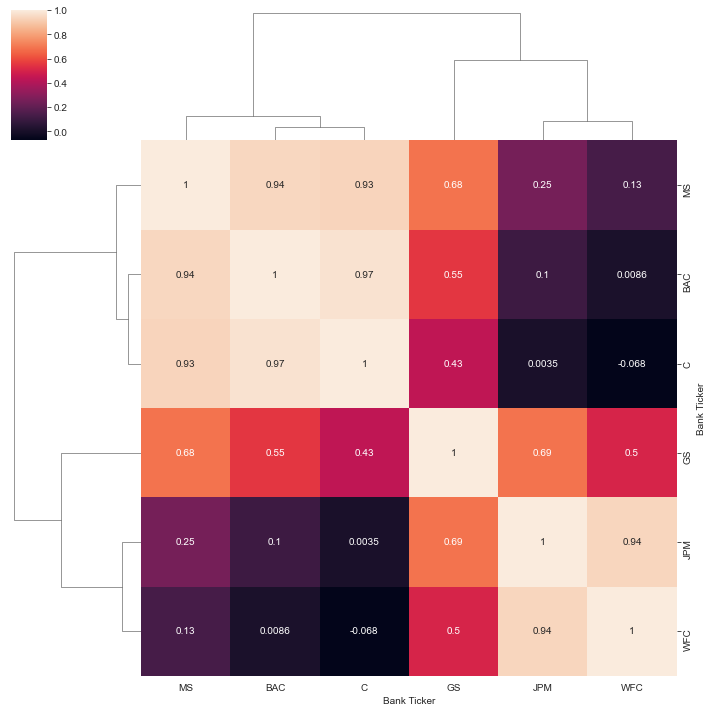

In [23]:
fig = plt.figure(figsize=(12, 10))
sns.clustermap(close_price, annot=True)

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [24]:
BAC.loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [25]:
MS.loc['2015-01-01':'2015-12-31'].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [26]:
BAC.loc['2015-01-01':'2015-12-31'].ta_plot(study='boll')

# Thank you!